In [195]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

导入数据集

In [269]:
#训练数据集
train=pd.read_csv('C:/Users/dell/Desktop/数据分析项目及其代码/泰坦尼克号/data/train.csv',engine ='python')
test=pd.read_csv('C:/Users/dell/Desktop/数据分析项目及其代码/泰坦尼克号/data/test.csv',engine ='python')
combine=[train,test]


In [197]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [199]:
train.head()
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [200]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [202]:
train.info()
print('*'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [203]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jalsevac, Mr. Ivan",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [205]:
train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [206]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [207]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [208]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [209]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


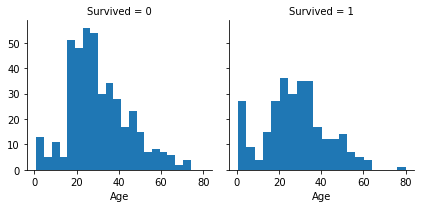

In [210]:
g = sns.FacetGrid(train, col='Survived')
# col,row,hue参数用于定义绘制数据的子集。由于survived有两个参数，会有两个图
g.map(plt.hist, 'Age', bins=20)
# hist直方图， ‘Age’为横坐标， bins绘制的直方数量

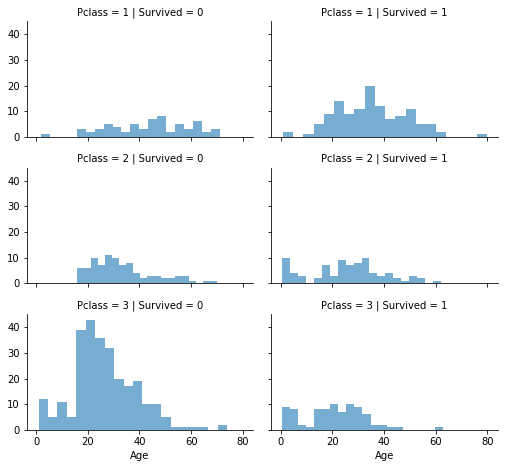

In [211]:
grid=sns.FacetGrid(train,col='Survived',row='Pclass',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.6,bins=20)#alpha(透明度)选项
grid.add_legend();

D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\program files\ANACONDA\envs\py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.redu

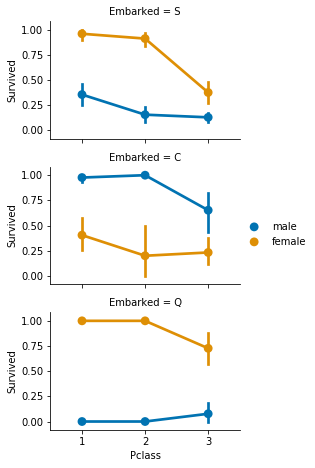

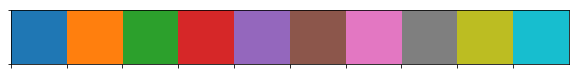

In [212]:
grid=sns.FacetGrid(train,row='Embarked',size=2.2,aspect=1.6)
sns.palplot(sns.color_palette())
#上例会显示seaborn预定义六个palette颜色：pastel，bold，muted，deep，dark和colorblind。
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='colorblind')
#在介绍seaborn的配色使用之前，
#首先需要介绍seaborn的调色板（palette）功能。

#通过sns.color_palette()函数设置或查看调色板（palette）,函数返回值是rgb元组的列表。调用sns.palplot()画出palette的每种颜色
grid.add_legend()

D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


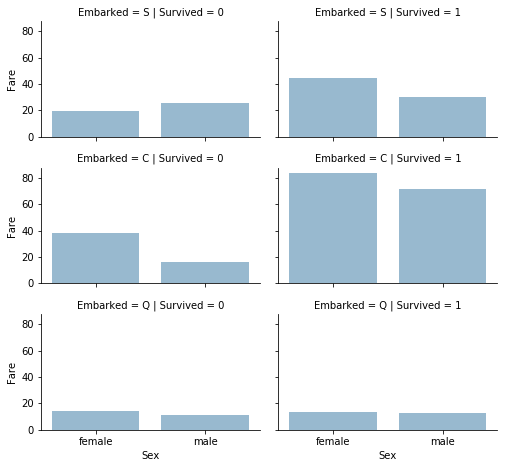

In [213]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5,ci=None)
grid.add_legend()

清洗数据

我们已经得到了一些假设和结论作为我们数据解决方案的准备。到目前为止我们还没有改动过单个特征和数值。现在让我们通过校正、创建和完善目标来验证我们的假设从而得出我们的结论。

# 特征降维来校正
## 这是一个好的开始。用特征降维我们可以得到更少的数据，从而加速我们的分析和运算。
## 基于我们的假设和推断，我们想要去给“客舱号”和“船票”特征降维。
## 标注出哪些操作需要我们同时在训练集和测试集使用以使其保持一致。

In [214]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test= test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

通过已有的特征创建新特征：
我们在丢弃Name与PassengerId这两个特征之前，希望从Name特征里提取出Titles的特征，并测试Titles与survival之间的关系。
 
在下面的代码中，我们通过正则提取了Title特征，正则表达式为(\w+\.)，它会在Name特征里匹配第一个以“.”号为结束的单词。
同时，指定expand=False的参数会返回一个DataFrame。
 
 

In [215]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
#https://www.cnblogs.com/greatfish/p/7572131.html一篇搞定Python正则表达式

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以使用高一些更常见的名字或“Rare”来代替一些Title，如：

In [216]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


①字典的创建

• 字典中的每个元素包含两部分：键和值。

• 键和值用冒号分隔，元素间用逗号分隔，所有元素放在一对大括号中。

d = {key1 : value1, key2 : value2 }
map() 会根据提供的函数对指定序列做映射。
map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10])
fillna()会填充nan数据，返回填充后的结果。如果希望在原DataFrame中修改，则把inplace设置为True

In [217]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以放心的从训练集与测试集里丢弃Name特征。同时，我们也不再需要训练集里的PassengerId特征：

In [218]:
train_df=train.drop(['Name','PassengerId'],axis=1)
test_df=test.drop(['Name'],axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [219]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


结论：
我们决定保留这个新的Title特征并加入到训练模型
 
转换一个离散型的特征
现在我们可以将一些包含字符串数据的特征转换为数值型特征，因为在很多建模算法里，输入的参数要求为数值型。
这个步骤可以让我们达到补全数据的目标。
 
我们可以从转换Sex特征开始，将female转换为1，male转换为0。我们可以将新的特征命名为Gender：

In [220]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


补全连续数值型特征
现在我们可以开始为那些含null值或者丢失值的特征补全数据。我们首先会为Age特征补全数据。
 
现在我们总结一下三种补全连续数值型特征数据的方法： 
1. 一个简单的方法是产生一个随机数，这个随机数的范围在这个特征的平均值以及标准差之间
2. 更精准的一个做法是使用与它相关的特征来做一个猜测。在这个案例中，我们发现Age，Gender和Pclass之间有关联。
    所以我们会使用一系列Pclass和Gender特征组合后的中值，作为猜测的Age值。
    所以我们会有一系列的猜测值如：当Pclass=1且Gender=0时，当Pclass=1且Gender=1时，等等…
3. 第三种方法是结合以上两种方法。我们可以根据一系列Pclass与Gender的组合，并使用第一种方法里提到的随机数来猜测缺失的Age值 
方法1与方法3会在模型里引入随机噪音，多次的结果可能会有所不同。所以我们在这更倾向于使用方法2：
 

D:\program files\ANACONDA\envs\py3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


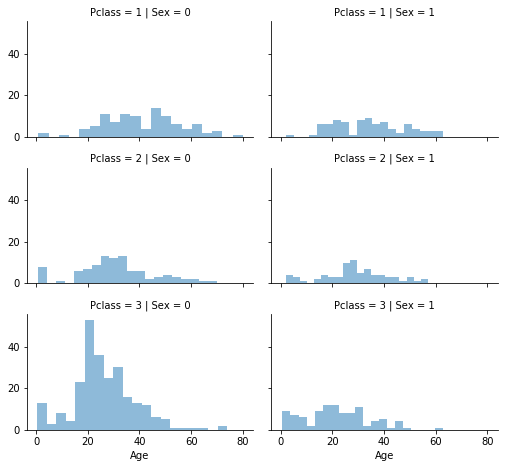

In [221]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [222]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

然后我们可以对Sex（0或1）和Pclass（1，2，3）进行迭代，并计算出在6中组合下所得到的猜测（Age）值：

In [223]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]
guess_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,893,3,1,47.00,1,0,7.0000,S,3
4,896,3,1,22.00,1,1,12.2875,S,3
6,898,3,1,30.00,0,0,7.6292,Q,2
8,900,3,1,18.00,0,0,7.2292,C,3
18,910,3,1,27.00,1,0,7.9250,S,2
19,911,3,1,45.00,0,0,7.2250,C,3
32,924,3,1,33.00,1,2,20.5750,S,3
33,925,3,1,NaN,1,2,23.4500,S,3
36,928,3,1,NaN,0,0,8.0500,S,2
37,929,3,1,21.00,0,0,8.6625,S,2


In [224]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
guess_df

1      47.00
4      22.00
6      30.00
8      18.00
18     27.00
19     45.00
32     33.00
37     21.00
49     36.00
63     22.00
66     18.00
70     24.00
72     29.00
79     24.00
86     27.00
87     18.00
90     22.00
98     20.00
104    16.00
113    18.50
117     1.00
125    17.00
138    23.00
140    10.00
153    36.00
157    23.00
159    26.00
165    26.00
169    22.00
197    18.00
206    35.00
214    38.00
263     1.00
280    23.00
283     9.00
284     2.00
291    30.00
309    45.00
313    37.00
315    17.00
333    19.00
345    16.00
347    38.00
354     0.17
359    30.00
367    22.00
376    22.00
383    19.00
409     3.00
412    28.00
Name: Age, dtype: float64

In [225]:
age_guess = guess_df.median()
age_guess 

22.0

In [226]:
# Convert random age float to nearest .5 age
guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

In [227]:
for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [228]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


现在我们对Age分段，并查看每段与Survived之间的相关性：

In [229]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().\
sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


然后我们根据上面的分段，使用有序的数值来替换Age里的值：

In [230]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


接着我们可以丢弃AgeBand特征：

In [231]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


通过已有的特征组合出新特征
现在我们可以通过组合Parch和SibSp特征，创建一个新的FamilySize特征。
这个步骤可以让我们从数据集里丢弃Parch与SibSp特征。

In [232]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'],\
                                             as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


接着我们可以创建另一个名为IsAlone的特征：

In [233]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


基于上面的数据表现，我们现在可以丢弃Parch、SibSp以及FamilySize的特征，保留IsAlone的特征：

In [234]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以通过结合Pclass 和 Age来创建一个新的特征：

In [235]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


补全一个离散型的特征
Embarked特征主要有三个值，分别为S，Q，C，对应了三个登船港口。
在训练集里，这个有2个缺失值，我们会使用频率最高的值来填充这个缺失值。

In [236]:
freq_port = train_df.Embarked.dropna().mode()[0]
# mode返回出现最多的数据，可能出现多个，因此返回数组
freq_port

'S'

In [237]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


将离散型特征转换为数值型
我们现在可以将离散型的Embarked特征转换为数值型特征

In [238]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [239]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


接下来我们将Fare分段：
qcut是根据这些值的频率来选择箱子的均匀间隔，即每个箱子中含有的数的数量是相同的
cut将根据值本身来选择箱子均匀间隔，即每个箱子的间距都是相同的

In [240]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [241]:
pd.qcut(train_df['Fare'], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

根据分段后的特征FareBand，将Fare转换为有序的数值型特征：

In [242]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [243]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [244]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression 是一个非常有用的模型，可以在工作流程里优先使用。

它通过使用估计概率的方法衡量了离散型特征与其他特征之间的关系，是一个渐增型的逻辑分布。
 

In [246]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#四舍五入精确到两位小数
acc_log

80.36


decision_function(X)	Predict confidence scores for samples.

densify()	Convert coefficient matrix to dense array format.

fit(X, y[, sample_weight])	Fit the model according to the given training data.

get_params([deep])	Get parameters for this estimator.

predict(X)	Predict class labels for samples in X.

predict_log_proba(X)	Log of probability estimates.

predict_proba(X)	Probability estimates.

score(X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.

set_params(**params)	Set the parameters of this estimator.

sparsify()	Convert coefficient matrix to sparse format.

In [247]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))# # 删除索引值为 0 的元素
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])##？？？
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


我们能利用逻辑回归来验证我们为特征创建和填补目标的假设和结论。这可以通过计算结论函数中的特征系数来完成。

正系数增加了对数响应（也增加了可能性）。并且负系数降低了对数响应（降低了可能性）。

‘性别’是最高正系数，意味着‘性别’特征值增加，存活可能性增加最大。

对于‘客舱等级’的增加，存活可能性降低最多。

‘年龄与客舱等级乘积’作为第二大的存活负相关特征，对于模型来说是一个不错的人工特征；

‘主题’是第二高的正相关特征值。

 

In [250]:
train_df.columns.delete(0)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Class'],
      dtype='object')

In [249]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df 

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Class


In [251]:
coeff_df.columns 

RangeIndex(start=0, stop=1, step=1)

In [252]:
logreg.coef_[0]

array([-0.74900619,  2.20152732,  0.28716443, -0.08514974,  0.26176224,
        0.398234  ,  0.12913994, -0.31119909])

接下来我们用支持向量机来建模，支持向量机是一种监督学习模型用于对数据进行分类和回归的分析。

定义一系列训练样本，每一个都有一个或者多个分类，支持向量机训练算法建立一个模型来对新的测试样本来分类，将它转换成非概率的二分类线性回归问题。

注意模型生成的可信度比逻辑回归模型更高。

 

In [253]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In [254]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [262]:
str(Y_pred).count()

TypeError: count() takes at least 1 argument (0 given)

In [263]:
len(Y_pred)

418

分类指标准确率(Precision)和正确率(Accuracy)的区别

In [264]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [265]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [266]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

D:\program files\ANACONDA\envs\py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [ ]:
full=train.append(test,ignore_index=True)

In [ ]:
embarkeddf=pd.get_dummies(full['Embarked'],prefix='Embarked')